In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### We will start with the case when K=2, i.e., the there are only values for the arrival rates
- The queueing system is G/M/s, with s being 1 during [0,t0] and 2 during [t0,T]

In [2]:
# arrival rate
lambda1 = 2
lambda2 = 4
arrival_rate = np.array([lambda1,lambda2])

# service rate
mu = 3

# total time, that is the office our is from 8:00 am to 6:00 pm, and will not accept new customers half hour before the end
T = 10

# time for the change in influx
t0 = 5

# let's consider the case when a new gate is open at time s, i.e. there are two counter serving
# the cost of operating one counter is c1 and two counters is c2, the upper bound for the daily cost is C
c1 = 5
c2 = 10
C = 8
s = 6

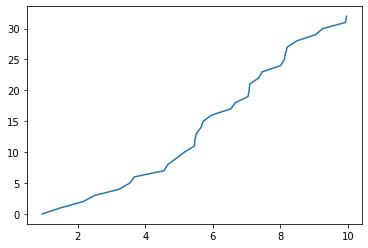

33

In [3]:
# For a single iteration of simulation

arrival_time=np.zeros([50,1])

# assign value of arrival time
n=0
while arrival_time[n]<10:
    if n==0:
        arrival_time[0]=np.random.exponential(1/lambda1)
        
    if arrival_time[n]<t0:
        arrival_time[n+1]+=arrival_time[n]+np.random.exponential(1/lambda1)
    else:
        arrival_time[n+1]+=arrival_time[n]+np.random.exponential(1/lambda2)
    n+=1

arrival_time=arrival_time[arrival_time>0][0:n,None]
plt.figure()
plt.plot(arrival_time,range(n))
plt.show()
    
n # the final number of customers


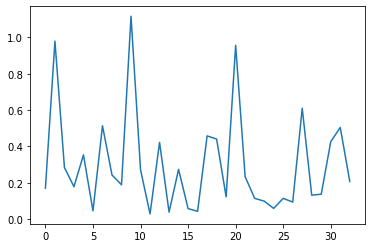

In [4]:
# service length
service_length=np.random.exponential(1/mu,[n,1])

plt.figure()
plt.plot(range(n),service_length)
plt.show()

In [5]:
# service starting time & service ending time
# let's start with only one gate
service_star_time=np.zeros([n,1])
service_end_time=np.zeros([n,1])
for k in range(n):
    if k==0:
        service_star_time[k]=arrival_time[k]
    else:
        service_star_time[k]=max(arrival_time[k],service_end_time[k-1])
    service_end_time[k]=service_star_time[k]+service_length[k]
      

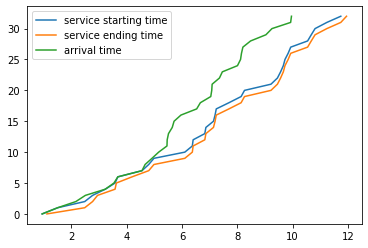

In [6]:
plt.figure()
plt.plot(service_star_time,range(n))
plt.plot(service_end_time,range(n))
plt.plot(arrival_time,range(n))
plt.legend(["service starting time","service ending time","arrival time"])
plt.show()

In [7]:
# new service start and ending time with new gate introduced
service_star_s_time=np.zeros([n,1])
service_end_s_time=np.zeros([n,1])
for k in range(n):
    if k==0:
        service_star_s_time[k]=arrival_time[k]
    else:
        service_star_s_time[k]=max(arrival_time[k],service_end_s_time[k-1])
    service_end_s_time[k]=service_star_s_time[k]+service_length[k]
    if  service_end_s_time[k]>=s:
        print("Found k")
        break
        
service_star_s_time[k+1]=max(s,arrival_time[k+1])
service_end_s_time[k+1]=service_star_time[k+1]+service_length[k+1]
for j in range(k+2,n):
    service_star_s_time[j]=max(arrival_time[j],min(service_end_s_time[j-1],service_end_s_time[j-2]))
    service_end_s_time[j]=service_star_s_time[j]+service_length[j]
          

Found k


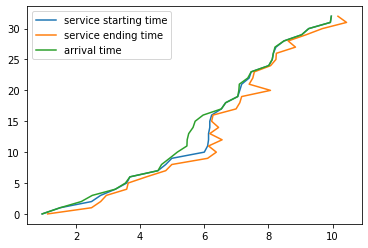

In [8]:
plt.figure()
plt.plot(service_star_s_time,range(n))
plt.plot(service_end_s_time,range(n))
plt.plot(arrival_time,range(n))
plt.legend(["service starting time","service ending time","arrival time"])
plt.show()

In [9]:
# waiting time given the gate is opened at time s
waiting_s_time=service_star_s_time-arrival_time
total_service_s_time=waiting_s_time+service_length
Wq_s=np.sum(waiting_s_time)/len(waiting_s_time)
print(Wq_s)

waiting_time=service_star_time-arrival_time
Wq=np.sum(waiting_time)/len(waiting_time)
print(Wq)

0.15189886113655257
1.0360967820816251


### Average over multiple iterations given s to get more accurate waiting time

In [10]:
def GenerateTime(arrival_rate=np.array([2,4]),mu=3,T=10,t0=5):
    '''
    generate the arrival time and the service length of each customer
    '''
    arrival_time=np.zeros([100,1])
    # assign value of arrival time
    n=0
    while arrival_time[n]<T:
        if n==0:
            arrival_time[0]=np.random.exponential(1/lambda1)

        if arrival_time[n]<t0:
            arrival_time[n+1]+=arrival_time[n]+np.random.exponential(1/lambda1)
        else:
            arrival_time[n+1]+=arrival_time[n]+np.random.exponential(1/lambda2)
        n+=1

    arrival_time=arrival_time[arrival_time>0][0:n,None]
    # service length
    service_length=np.random.exponential(1/mu,[n,1])
    return (arrival_time,service_length)
    
    

In [11]:
def WaitingTimeS(arrival_time,service_length,s):
    '''
     compute the expected waitng time in queue when the new gate is introduced at s
    '''
    n=np.shape(arrival_time)[0]
    service_star_s_time=np.zeros([n,1])
    service_end_s_time=np.zeros([n,1])
    for k in range(n):
        if k==0:
            service_star_s_time[k]=arrival_time[k]
        else:
            service_star_s_time[k]=max(arrival_time[k],service_end_s_time[k-1])
        service_end_s_time[k]=service_star_s_time[k]+service_length[k]
        if  service_end_s_time[k]>=s:
            break
    if k+1<n:
        service_star_s_time[k+1]=max(s,arrival_time[k+1])
        service_end_s_time[k+1]=service_star_s_time[k+1]+service_length[k+1]
        for j in range(k+2,n):
            service_star_s_time[j]=max(arrival_time[j],min(service_end_s_time[j-1],service_end_s_time[j-2]))
            service_end_s_time[j]=service_star_s_time[j]+service_length[j]
    waiting_s_time=service_star_s_time-arrival_time   
    Wq_s=np.sum(waiting_s_time)/len(waiting_s_time)
    
    return Wq_s

In [12]:
def WaitingTime(arrival_time,service_length):
    '''
    compute the expected waiting time in queue when there is only one gate
    '''
    n=np.shape(arrival_time)[0]
    service_star_time=np.zeros([n,1])
    service_end_time=np.zeros([n,1])
    for k in range(n):
        if k==0:
            service_star_time[k]=arrival_time[k]
        else:
            service_star_time[k]=max(arrival_time[k],service_end_time[k-1])
        service_end_time[k]=service_star_time[k]+service_length[k]
        
    waiting_time=service_star_time-arrival_time   
    Wq=np.sum(waiting_time)/len(waiting_time)
    
    return Wq
    

In [13]:
# calculate the average weighting time over M iterations
M=10000 # number of iterations
Wq_s_averaged=0
Wq_averaged=0
for i in range(M):
    (arrival_time,service_length)=GenerateTime(arrival_rate=np.array([2,4]),mu=3,T=10,t0=5)
    Wq_s_averaged+=WaitingTimeS(arrival_time,service_length,s)
    Wq_averaged+=WaitingTime(arrival_time,service_length)
    if i%1000==0:
        print("Iteration",i)
Wq_s_averaged=Wq_s_averaged/M
Wq_averaged=Wq_averaged/M
print("Wq_s:",Wq_s_averaged,"Wq",Wq_averaged)

Iteration 0
Iteration 1000
Iteration 2000
Iteration 3000
Iteration 4000
Iteration 5000
Iteration 6000
Iteration 7000
Iteration 8000
Iteration 9000
Wq_s: 0.22406237949124888 Wq 1.1056750691821557


### Optimize Wq over s in the feasible region

In [14]:
def WqAverage(arrival_rate=np.array([2,4]),mu=3,T=10,t0=5,s=6,options=False):
    '''
    calculate the average weighting time over M iterations
    '''
    M=1000 # number of iterations
    Wq_s_averaged=0
    for i in range(M):
        (arrival_time,service_length)=GenerateTime(arrival_rate=np.array([2,4]),mu=3,T=10,t0=5)
        Wq_s_averaged+=WaitingTimeS(arrival_time,service_length,s)
        if options:
            if i%1000==0:
                print("Iteration",i)
    return Wq_s_averaged/M

In [15]:
WqAverage(arrival_rate=np.array([2,4]),mu=3,T=10,t0=5,s=6)

0.22696048191119567

In [16]:
# the feasible region when k=2 is characterized as s>max(T*(c2-C)/(c2-c1),t0) for c2>c>c1
N=20
s_lst=np.linspace(max(T*(c2-C)/(c2-c1),t0),T,N)
Wq_s=np.zeros([N,1])

index=0
for s in s_lst:
    Wq_s[index]=WqAverage(arrival_rate=np.array([2,4]),mu=3,T=10,t0=5,s=s,options=False)
    index+=1

In [17]:
val, idx = min((val, idx) for (idx, val) in enumerate(Wq_s))

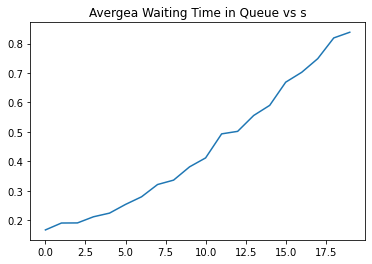

In [19]:
plt.figure()
plt.plot(range(N),Wq_s)
plt.title("Avergea Waiting Time in Queue vs s")
plt.show()